## Transfer Function

If the system takes input $x(t)$ and produces output $y(t)$, the transfer function is given by

$$H(s) = \frac{Y(s)}{X(s)} = \frac{\mathcal{L}\{y(t)\}}{\mathcal{L}\{x(t)\}}$$

Assume I will start feeding a sinusoid $x(t) = x_0 sin(\omega t)$ into a damped harmonic oscillator $y(t) = \zeta \ddot{x} + \tau \dot{x} + kx$ starting at time $t=0$

Then

$$Y(s) = X(s) \biggl(\zeta s^2 + \tau s + k \biggr)$$

$$H(s) = \biggl(\zeta s^2 + \tau s + k \biggr)$$


### Optimizing Parameters for Stability

Consider a linear system with transfer function

$$H(s, k) = \frac{1}{s^3+4s^2+ks+1}$$

Where $k$ is a free parameter. The goal is to find the range of $k$ for which the system is stable. Stability is achieved when the real part of all poles is negative

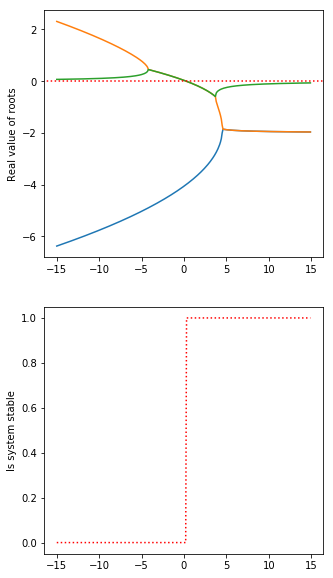

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define polynomial of the denominator
poly = lambda k: [1, 4, k, 1]

# Sweep free parameter, compute real parts of roots
k_lst = np.arange(-15, 15, 0.1)
s_lst = [np.roots(poly(k)) for k in k_lst]
re_lst = [[np.real(r) for r in s] for s in s_lst]

# Determine for what parameter values the system is stable
isStable = [np.max(re) < 0 for re in re_lst]

fig, ax = plt.subplots(nrows=2, figsize=(5, 10))
ax[0].plot(k_lst, re_lst)
ax[0].axhline(y=0, xmin=-10, xmax=10, color='red', linestyle=':')
ax[1].plot(k_lst, isStable, color='red', linestyle=':')
ax[0].set_ylabel("Real value of roots")
ax[1].set_ylabel("Is system stable")
plt.show()

## Bode Plot

Let's assume a simple predictive coding system. It has input $x(t)$, which is used to compute error $\epsilon(t) = x(t) - y(t)$. The error is then low-pass-filtered, accodring to
$$\tau_1 \dot{\epsilon}' = \epsilon' + \epsilon$$
and integrated, according to
$$\tau_2 \dot{y} = \epsilon'$$

Applying Laplace Transform to each equation the partial transfer functions are
$$H_1(s) = \frac{\epsilon'(s)}{\epsilon(s)} = \frac{1}{\tau_1 s - 1}$$
$$H_2(s) = \frac{y(s)}{\epsilon'(s)} = \frac{1}{\tau_2 s}$$
the total open loop transfer function is
$$H_O(s) = H_1(s)H_2(s) = \frac{y(s)}{\epsilon(s)} = \frac{1}{\tau_2 s}\frac{1}{\tau_1 s - 1}$$
and the total closed loop transfer function is
$$H_C(s) = \frac{y(s)}{x(s)} = \frac{y(s)}{y(s) + \epsilon(s)} = \frac{1}{1 + H_O(s)}$$

**TODO**:
* Plot Bode Plots for open and closed loop systems
* Determine stability criteria
* Determine error minimization criteria. How does system operate if the error is zero?
* Construct a lead-lag compensator
* Revert the system with compensator back into time-domain

Transfer function - original 1/(1 + 1/(2*s*(5*s - 1)))
Transfer function - numerator 10*s**2 - 2*s
Transfer function - denominator 10*s**2 - 2*s + 1
zeros = [0j, (0.2+0j)]
poles = [(0.1-0.3j), (0.1+0.3j)]


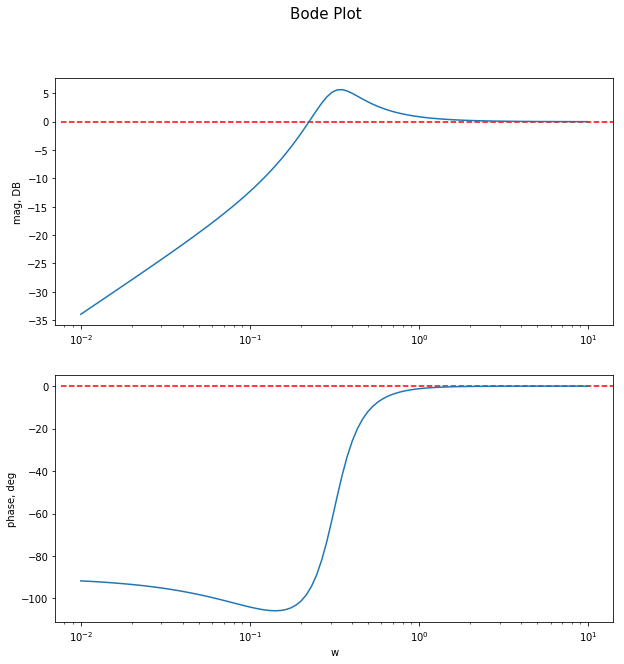

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sympy import simplify, fraction, expand, solve, Poly

def bodeplot(H, verbose=True):
    # Simplify, find numerator and denominator, find poles and zeros
    coeff = lambda h : [float(c) for c in Poly(h, s).all_coeffs()]
    num, den = [expand(expr) for expr in fraction(simplify(H))]
    num_coeff = coeff(num)
    den_coeff = coeff(den)
    zeros = [complex(z) for z in sympy.solve(num, s)]
    poles = [complex(z) for z in sympy.solve(den, s)]

    if verbose:
        print("Transfer function - original", H)
        print("Transfer function - numerator", num)
        print("Transfer function - denominator", den)
        print("zeros =", zeros)
        print("poles =", poles)
    
    # Get magnitude and phase sweep
    sig = signal.lti(num_coeff, den_coeff)
    w, mag, phase = signal.bode(sig)

    fig, ax = plt.subplots(nrows=2, figsize = (10, 10))
    fig.suptitle('Bode Plot', fontsize=15)
    ax[0].axhline(y=0, linestyle='--', color='r', xmin=np.min(w), xmax=np.max(w))
    ax[1].axhline(y=0, linestyle='--', color='r', xmin=np.min(w), xmax=np.max(w))
    ax[0].semilogx(w, mag)    # Bode magnitude plot
    ax[1].semilogx(w, phase)  # Bode phase plot
    ax[0].set_ylabel('mag, DB')
    ax[1].set_ylabel('phase, deg')
    ax[1].set_xlabel('w')
    plt.show()

# Construct symbolic expression
s = sympy.symbols('s')
H = 1 / (1 + 1/(2*s) * 1/(5*s-1))

# Plot Bode Plot
bodeplot(H)